In [59]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-salaries-2023/ds_salaries.csv


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df=pd.read_csv('/kaggle/input/data-science-salaries-2023/ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [63]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [64]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


In [65]:
df.describe

<bound method NDFrame.describe of       work_year experience_level employment_type                 job_title  \
0          2023               SE              FT  Principal Data Scientist   
1          2023               MI              CT               ML Engineer   
2          2023               MI              CT               ML Engineer   
3          2023               SE              FT            Data Scientist   
4          2023               SE              FT            Data Scientist   
...         ...              ...             ...                       ...   
3750       2020               SE              FT            Data Scientist   
3751       2021               MI              FT  Principal Data Scientist   
3752       2020               EN              FT            Data Scientist   
3753       2020               EN              CT     Business Data Analyst   
3754       2021               SE              FT      Data Science Manager   

       salary salary_currency

In [66]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [67]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [68]:
#Top 10 most common job titles
df.value_counts
data= pd.DataFrame(df.value_counts())
data

count
work_year experience_level employment_type job_title          salary salary_currency salary_in_usd employee_residence remote_ratio company_location company_size       
2022      SE               FT              Data Scientist     191475 USD             191475        US                 100          US               M                21
                                                              141525 USD             141525        US                 100          US               M                21
2023      SE               FT              Data Engineer      252000 USD             252000        US                 0            US               M                13
                                                              129000 USD             129000        US                 0            US               M                13
2022      SE               FT              Data Engineer      130000 USD             130000        US                 0            US               M                12
...                                                                                                                                                                 ...
                                           Data Analyst       136600 USD             136600        US                 100          US               M                 1
                                                              139600 USD             139600        US                 0            US               M                 1
                                                              140000 USD             140000        US                 100          US               M                 1
                                                              144000 USD             144000        US                 100          US               M                 1
2023      SE               FT              Research Scientist 370000 USD             370000        US                 0            US               M                 1

[2584 rows x 1 columns]

In [69]:
Job_t= pd.DataFrame(df.groupby('salary_currency').count())
ind_j=Job_t.index
ind_j

Index(['AUD', 'BRL', 'CAD', 'CHF', 'CLP', 'CZK', 'DKK', 'EUR', 'GBP', 'HKD',
       'HUF', 'ILS', 'INR', 'JPY', 'MXN', 'PLN', 'SGD', 'THB', 'TRY', 'USD'],
      dtype='object', name='salary_currency')

In [70]:
#Top 10 most common job titles
df1 = pd.DataFrame(df)

# Count occurrences of each job title
job_counts = df1['job_title'].value_counts()

# Get the top 10 most common job titles
Top10_job_titles = job_counts.nlargest(10)

# Print the result
print(Top10_job_titles)


job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: count, dtype: int64


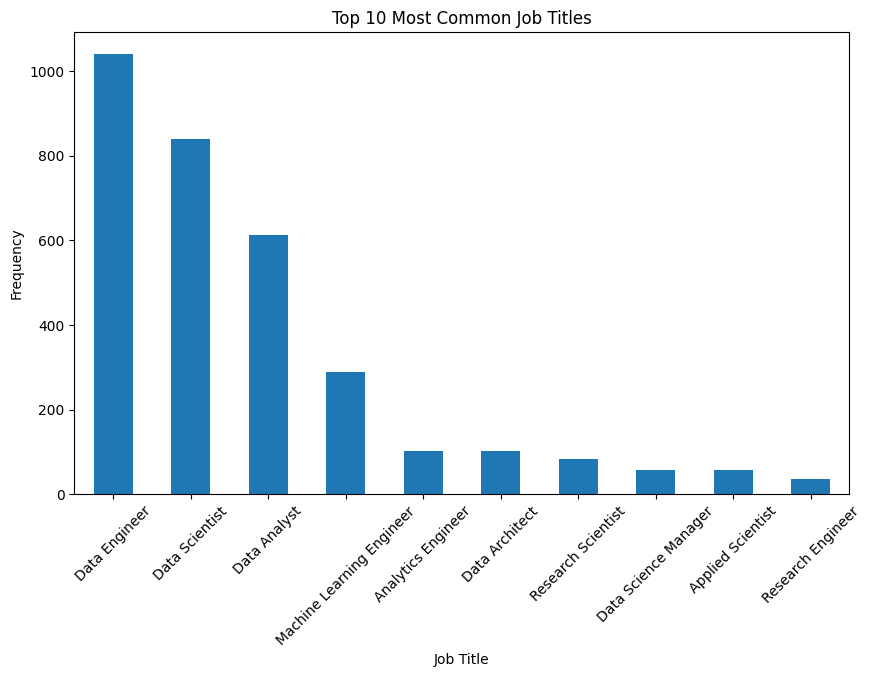

In [71]:
# Plot a bar chart
plt.figure(figsize=(10, 6))
Top10_job_titles.plot(kind='bar')
plt.title('Top 10 Most Common Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [72]:
# Employees with their residence the same as the company location
# Filter employees where Residence is the same as CompanyLocation
same_location = df1[df1['employee_residence'] == df1['company_location']]

# Print the filtered data
same_location

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [73]:
same_location.loc[:,['job_title','employee_residence','company_location']]# To select entire specific column use ':'

,job_title,employee_residence,company_location
0,Principal Data Scientist,ES,ES
1,ML Engineer,US,US
2,ML Engineer,US,US
3,Data Scientist,CA,CA
4,Data Scientist,CA,CA
...,...,...,...
3750,Data Scientist,US,US
3751,Principal Data Scientist,US,US
3752,Data Scientist,US,US
3753,Business Data Analyst,US,US


In [74]:
same_location.loc[0:10,['job_title','employee_residence','company_location']]# To select Top 10 rows from specific column use ':'

,job_title,employee_residence,company_location
0,Principal Data Scientist,ES,ES
1,ML Engineer,US,US
2,ML Engineer,US,US
3,Data Scientist,CA,CA
4,Data Scientist,CA,CA
5,Applied Scientist,US,US
6,Applied Scientist,US,US
7,Data Scientist,CA,CA
8,Data Scientist,CA,CA
9,Data Scientist,US,US


In [75]:
#Top 10 company location with most employees

# Count occurrences of each company location
location_counts = df['company_location'].value_counts()

# Get the top 10 company locations with the most employees
Top10_locations = location_counts.nlargest(10)

# Print the result
print(Top10_locations)

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
DE      56
FR      34
BR      15
AU      14
GR      14
Name: count, dtype: int64


In [76]:
# Average salary over the years

# Group by year and calculate the average (mean) salary for each year
average_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean().round(2)
average_salary_by_year

work_year
2020     92302.63
2021     94087.21
2022    133338.62
2023    149045.54
Name: salary_in_usd, dtype: float64

In [77]:
### finding the average salary over the years ###
 
#finding it first for 2020
 
df_2020 = df[df["work_year"] == 2020]
df_2020
 
average_salary_2020 = df_2020["salary_in_usd"].mean().round(2)
print("The average 2020 salary was:",average_salary_2020)
 
# finding the average 2021 salary
 
df_2021 = df[df["work_year"] == 2021]
df_2021
 
average_salary_2021 = df_2021["salary_in_usd"].mean().round(2)
print("The average 2021 salary was:",average_salary_2021)
 
# finding the average 2022 salary
 
df_2022 = df[df["work_year"] == 2022]
df_2022
 
average_salary_2022 = df_2022["salary_in_usd"].mean().round(2)
print("The average 2022 salary was:", average_salary_2022)
 
# finding the average 2023 salary
 
df_2023 = df[df["work_year"] == 2023]
df_2023
 
average_salary_2023 = df_2023["salary_in_usd"].mean().round(2)
print("The average 2023 salary was:",average_salary_2023)

The average 2020 salary was: 92302.63
The average 2021 salary was: 94087.21
The average 2022 salary was: 133338.62
The average 2023 salary was: 149045.54


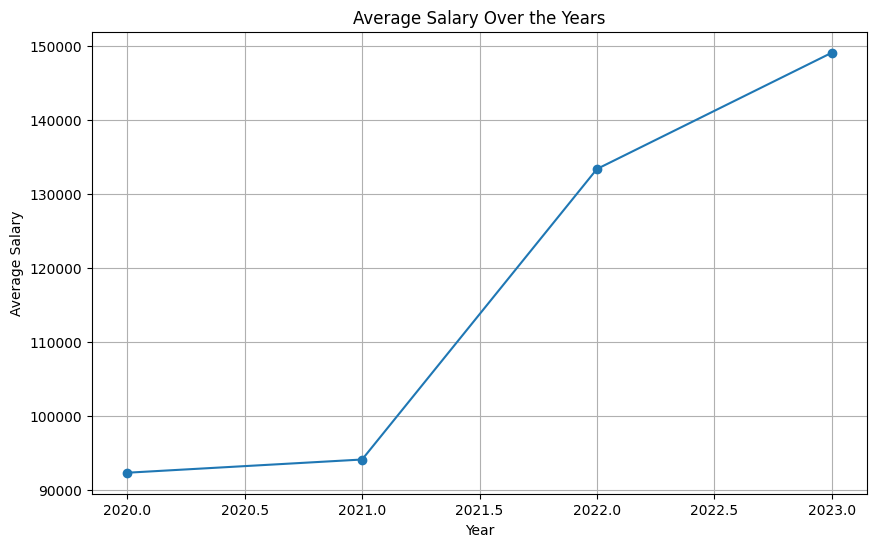

In [78]:
# Plot the average salary over the years
plt.figure(figsize=(10, 6))
average_salary_by_year.plot(kind='line', marker='o')
plt.title('Average Salary Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid(True)
plt.show()

In [79]:
# Average salary for the top 10 most common jobs
# Count occurrences of each job title
job_counts = df['job_title'].value_counts()

# Get the top 10 most common job titles
Top10_jobs = job_counts.nlargest(10).index

# Filter the dataframe to include only the top 10 job titles
Top10_df = df[df['job_title'].isin(Top10_jobs)]

# Calculate the average salary for each of the top 10 job titles 
# round(2) use for round values upto 2 decimal no. 
average_salary_top10 = Top10_df.groupby('job_title')['salary_in_usd'].mean().round(2)

average_salary_top10

job_title
Analytics Engineer           152368.63
Applied Scientist            190264.48
Data Analyst                 108716.23
Data Architect               161713.77
Data Engineer                142785.73
Data Science Manager         191278.78
Data Scientist               140869.77
Machine Learning Engineer    154690.73
Research Engineer            163108.38
Research Scientist           161214.20
Name: salary_in_usd, dtype: float64

In [80]:
average_salary_top10.sort_values(ascending=True).round(2)

job_title
Data Analyst                 108716.23
Data Scientist               140869.77
Data Engineer                142785.73
Analytics Engineer           152368.63
Machine Learning Engineer    154690.73
Research Scientist           161214.20
Data Architect               161713.77
Research Engineer            163108.38
Applied Scientist            190264.48
Data Science Manager         191278.78
Name: salary_in_usd, dtype: float64

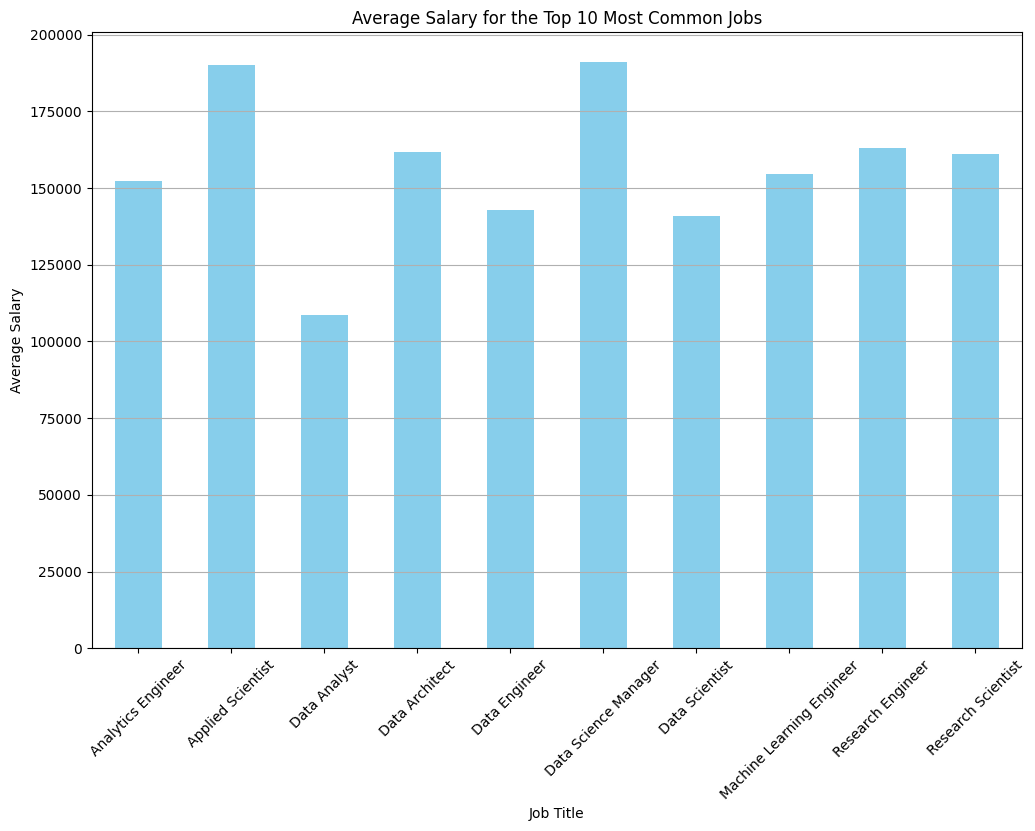

In [81]:
# Plot the graph showing Average Salary for the Top 10 Most Common Jobs:
plt.figure(figsize=(12, 8))
average_salary_top10.plot(kind='bar', color='skyblue')
plt.title('Average Salary for the Top 10 Most Common Jobs')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [82]:
pivot_table_mean_salary = pd.pivot_table(

    data=df,

    values='salary_in_usd',

    index='work_year',

    aggfunc='mean'

)

pivot_table_mean_salary

,salary_in_usd
work_year,
2020,92302.631579
2021,94087.208696
2022,133338.620793
2023,149045.541176


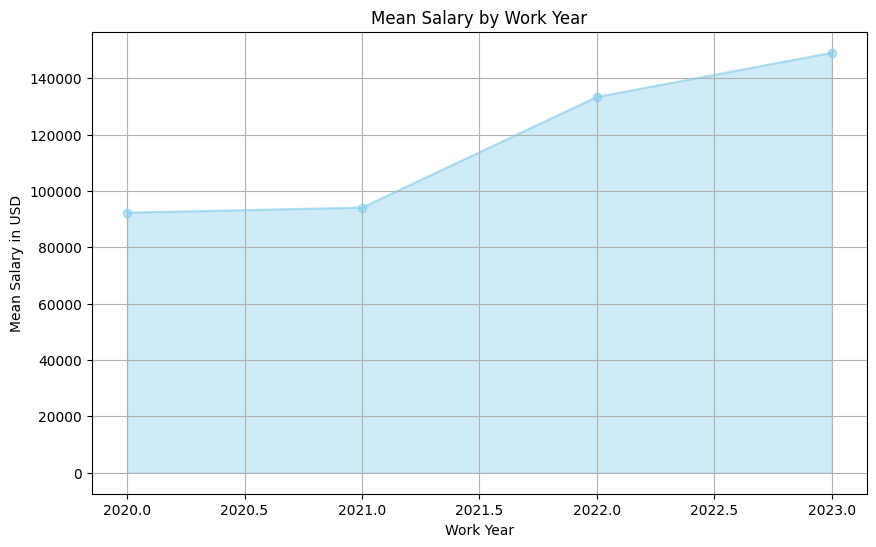

In [83]:
# Area plot
plt.figure(figsize=(10, 6))
plt.fill_between(pivot_table_mean_salary.index, pivot_table_mean_salary['salary_in_usd'], color='skyblue', alpha=0.4)
plt.plot(pivot_table_mean_salary.index, pivot_table_mean_salary['salary_in_usd'], marker='o', color='skyblue', alpha=0.6)
plt.title('Mean Salary by Work Year')
plt.xlabel('Work Year')
plt.ylabel('Mean Salary in USD')
plt.grid(True)
plt.show()

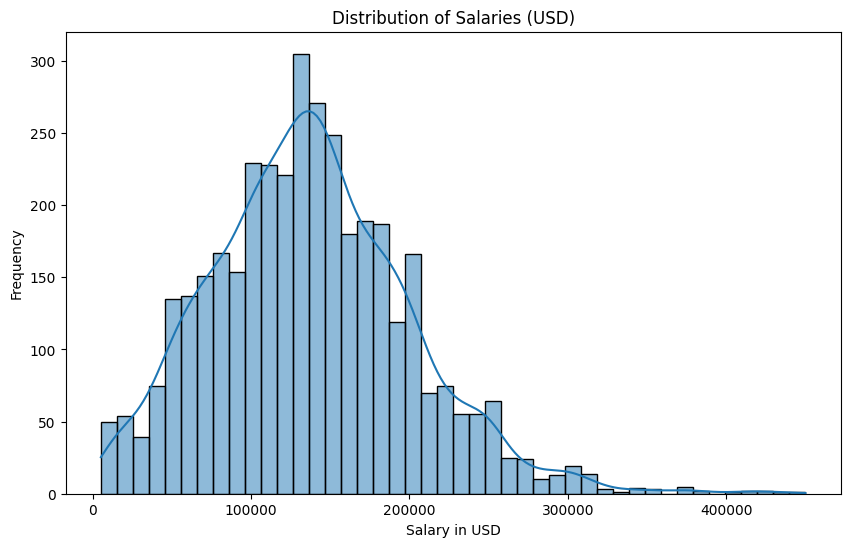

In [84]:
# Distribution of Salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_in_usd'], kde=True)
plt.title('Distribution of Salaries (USD)')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()

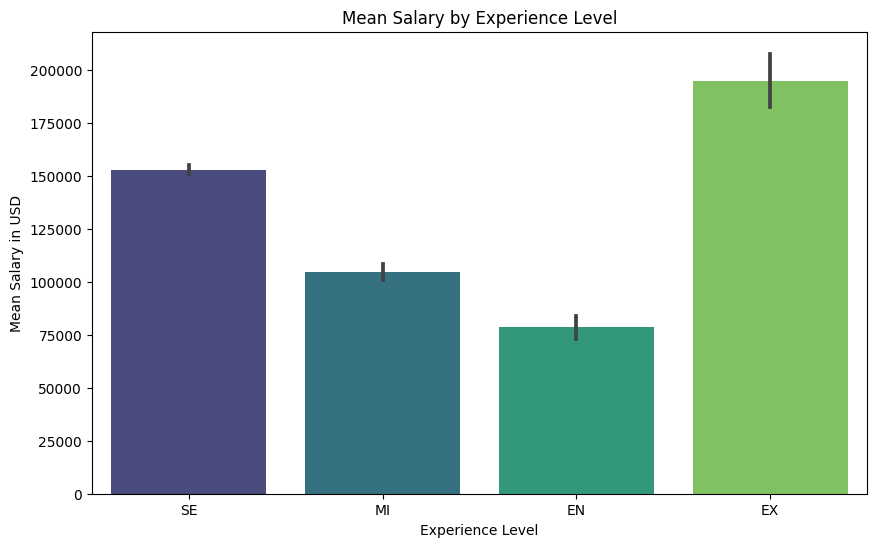

In [85]:
# Salary by Experience Level
# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='experience_level', y='salary_in_usd', data=df, palette='viridis')
plt.title('Mean Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Mean Salary in USD')
plt.show()

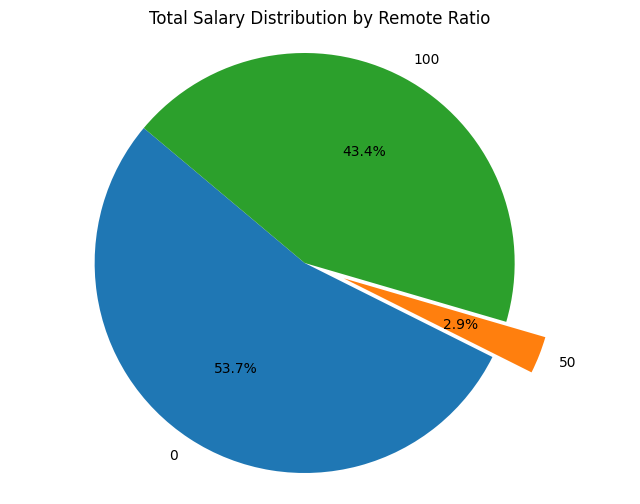

In [86]:
# Salary by Remote Ratio
# Calculate the total salary for each remote ratio
total_salary_by_remote_ratio = df.groupby('remote_ratio')['salary_in_usd'].sum().reset_index()

# Prepare data for the pie chart
labels = total_salary_by_remote_ratio['remote_ratio']
sizes = total_salary_by_remote_ratio['salary_in_usd']

# Create the pie chart
plt.figure(figsize=(8, 6))
explode=(0,0.2,0)
plt.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Total Salary Distribution by Remote Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()